In [1]:
from semra.landscape.anatomy import CONFIGURATION
from semra.landscape.utils import notebook

/Users/cthoyt/.virtualenvs/indra/lib/python3.11/site-packages/pydantic/_internal/_config.py:322: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)


## Summarize the Resources

We summarize the resources used in the landscape analysis, including their [Bioregistry](https://bioregistry.io)
prefix, license, current version, and number of terms (i.e., named concepts) they contain.


,name,license,version,terms,status
prefix,,,,,
uberon,Uber Anatomy Ontology,CC-BY-3.0,2024-03-22,14480,full
mesh,Medical Subject Headings,CC0-1.0,2024,1796,subset
bto,BRENDA Tissue Ontology,CC-BY-4.0,2021-10-26,6511,full
caro,Common Anatomy Reference Ontology,CC-BY-4.0,2023-03-15,84,full
ncit,NCI Thesaurus,CC-BY-4.0,24.02d,7556,subset
umls,Unified Medical Language System Concept Unique...,https://www.nlm.nih.gov/research/umls/knowledg...,2023AB,7490,subset


There are a total of 37,917 terms across the 6 resources.

## Summarize the Mappings

In order to summarize the mappings, we're going to load them, index them, and count
the number of mappings between each pair of resources. The self-mapping column is
the count of terms in the resource. We'll do this to the raw mappings first, then
to the processed mappings, then compare them.


Indexing mappings:   0%|          | 0.00/55.6k [00:00<?, ?mapping/s]

Indexing mappings:   0%|          | 0.00/24.8k [00:00<?, ?mapping/s]

First, we summarize the raw mappings, i.e., the mappings that are directly available from the sources

target_prefix,uberon,mesh,bto,caro,ncit,umls
source_prefix,,,,,,
uberon,14480,1080,1461,52,2526,281
mesh,1080,1796,0,0,28,160
bto,1461,0,6511,0,0,0
caro,52,0,0,84,0,0
ncit,2526,28,0,0,7556,518
umls,281,160,0,0,518,7490


Next, we summarize the processed mappings, which include inference, reasoning, and confidence filtering.

target_prefix,uberon,mesh,bto,caro,ncit,umls
source_prefix,,,,,,
uberon,14480,1082,1461,52,2555,311
mesh,1082,1796,55,0,75,160
bto,1461,55,6511,6,814,122
caro,52,0,6,84,20,9
ncit,2555,75,814,20,7556,529
umls,311,160,122,9,529,7490


Below is an graph-based view on the processed mappings.

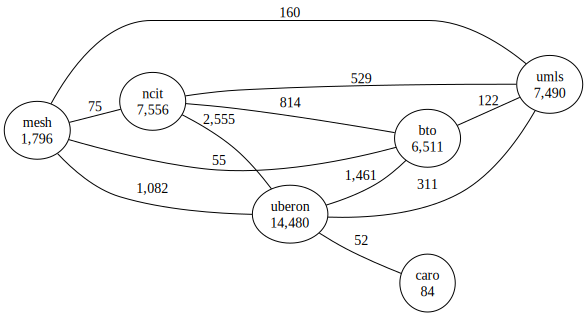

## Comparison

The following comparison shows the absolute number of mappings added by processing/inference.
Across the board, this process adds large numbers of mappings to most resources, especially
ones that were previously only connected to a small number of other resources.


target_prefix,uberon,mesh,bto,caro,ncit,umls
source_prefix,,,,,,
uberon,0,2,0,0,29,30
mesh,2,0,55,0,47,0
bto,0,55,0,6,814,122
caro,0,0,6,0,20,9
ncit,29,47,814,20,0,11
umls,30,0,122,9,11,0


Here's an alternative view on the number of mappings normalized to show percentage gain.

Note:

- `inf` means that there were no mappings before and now there are a non-zero number of mappings
- `NaN` means there were no mappings before inference and continue to be no mappings after inference


target_prefix,uberon,mesh,bto,caro,ncit,umls
source_prefix,,,,,,
uberon,0.0,0.2,0.0,0.0,1.1,10.7
mesh,0.2,0.0,inf,NaN,167.9,0.0
bto,0.0,inf,0.0,inf,inf,inf
caro,0.0,NaN,inf,0.0,inf,inf
ncit,1.1,167.9,inf,inf,0.0,2.1
umls,10.7,0.0,inf,inf,2.1,0.0


## Landscape Analysis

Before, we looked at the overlaps between each resource. Now, we use that information jointly to
estimate the number of terms in the landscape itself, and estimate how much of the landscape
each resource covers.


This estimates a total of 32,067 unique entities.

- 3,523 (11.0%) have
  at least one mapping.
- 28,544 (89.0%)
  are unique to a single resource.
- 1 (0.0%)
  appear in all 6 resources.

This estimate is susceptible to several caveats:

- Missing mappings inflates this measurement
- Generic resources like MeSH contain irrelevant entities that can't be mapped


Because there are 6, there are 63 possible overlaps to consider.
Therefore, a Venn diagram is not possible, so we
we use an [UpSet plot](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4720993) (Lex *et al.*, 2014)
as a high-dimensional Venn diagram.


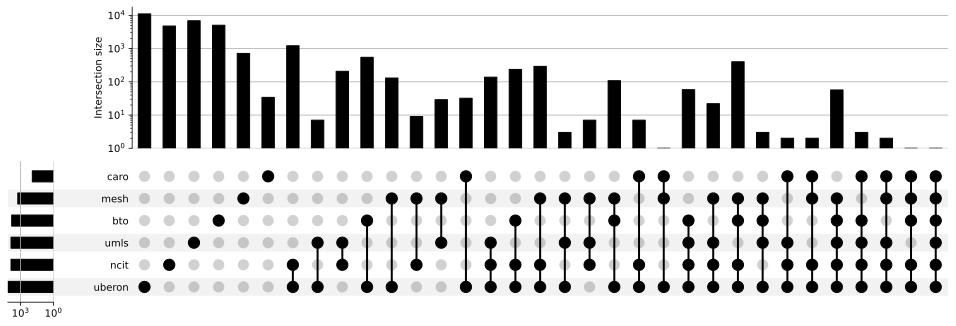

We now aggregate the mappings together to estimate the number of unique entities and number
that appear in each group of resources.


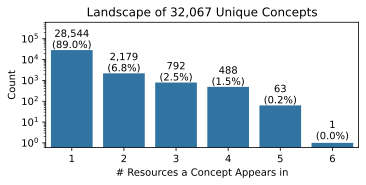

\
        The landscape of 6 resources has 37,917 total terms.
        After merging redundant nodes based on mappings, inference, and reasoning, there
        are 32,067 unique concepts. Using the reduction formula
        $\frac{\text{total terms} - \text{reduced terms}}{\text{total terms}}$,
        this is a 15.4% reduction.


This is only an estimate and is susceptible to a few things:

1. It can be artificially high because there are entities that _should_ be mapped, but are not
2. It can be artificially low because there are entities that are incorrectly mapped, e.g., as
   a result of inference. The frontend curation interface can help identify and remove these
3. It can be artificially low because for some vocabularies like SNOMED-CT, it's not possible
   to load a terms list, and therefore it's not possible to account for terms that aren't mapped.
   Therefore, we make a lower bound estimate based on the terms that appear in mappings
4. It can be artificially high if a vocabulary is used that covers many domains and is not properly
   subset'd. For example, EFO covers many different domains, so when doing disease landscape
   analysis, it should be subset to only terms in the disease hierarchy (i.e., appearing under
   ``efo:0000408``).
5. It can be affected by terminology issues, such as the confusion between Orphanet and ORDO
6. It can be affected by the existence of many-to-many mappings, which are filtered out during
   processing, which makes the estimate artificially high since some subset of those entities
   could be mapped, but it's not clear which should.


In [2]:
_ = notebook(CONFIGURATION, output_directory=".")